In [1]:
import pandas as pd
import os

In [3]:
diretorio_atual = os.getcwd()
os.chdir(diretorio_atual)

In [9]:
df_exportacoes = pd.read_excel('exportacoes_BRICS.xlsx')
df_importacoes = pd.read_excel('importacoes_BRICS.xlsx')
df_cambio = pd.read_excel('cambio_BRICS.xlsx')
df_tarifas = pd.read_excel('tarifas_BRICS.xlsx')

In [17]:
df_pib = pd.read_excel('pib_BRICS1.xlsx')

In [71]:
brics = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
df_pib_brics = df_pib[df_pib['Country Name'].isin(brics)]

In [73]:
with pd.ExcelWriter('dados_brics.xlsx') as writer:
    df_exportacoes.to_excel(writer, sheet_name='Exportacoes', index=False)
    df_importacoes.to_excel(writer, sheet_name='Importacoes', index=False)
    df_pib_brics.to_excel(writer, sheet_name='PIB', index=False)
    df_cambio.to_excel(writer, sheet_name='Cambio', index=False)
    df_tarifas.to_excel(writer, sheet_name='Tarifas', index=False)

print("✅ dados_brics.xlsx criado com sucesso!")

✅ dados_brics.xlsx criado com sucesso!


In [75]:
print(df_exportacoes.head())
print(df_importacoes.head())
print(df_pib_brics.head())
print(df_cambio.head())
print(df_tarifas.head())

    ANO  ORIGEM             DESTINO   VALOR (US$)
0  2015  Brazil               China  3.515535e+10
1  2015  Brazil  Russian Federation  2.463243e+09
2  2015  Brazil               India  3.617195e+09
3  2015  Brazil        South Africa  1.353282e+09
4  2015   China              Brazil  2.741223e+10
    ANO DESTINO              ORIGEM   VALOR (US$)
0  2015  Brazil               China  3.199901e+10
1  2015  Brazil  Russian Federation  2.357546e+09
2  2015  Brazil               India  4.481209e+09
3  2015  Brazil        South Africa  6.776057e+08
4  2015   China              Brazil  4.408936e+10
           Country Name          2015          2016          2017  \
29               Brazil  1.802212e+12  1.795693e+12  2.063515e+12   
40                China  1.128081e+13  1.145602e+13  1.253756e+13   
109               India  2.103588e+12  2.294797e+12  2.651474e+12   
202  Russian Federation  1.363482e+12  1.276786e+12  1.574199e+12   
263        South Africa  3.467098e+11  3.235855e+11  3.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

In [79]:
xls = pd.ExcelFile("dados_brics.xlsx")

df_exportacoes = pd.read_excel(xls, sheet_name="Exportacoes")
df_importacoes = pd.read_excel(xls, sheet_name="Importacoes")
df_pib_brics         = pd.read_excel(xls, sheet_name="PIB")
df_cambio      = pd.read_excel(xls, sheet_name="Cambio")
df_tarifas     = pd.read_excel(xls, sheet_name="Tarifas")

In [113]:
print("Exportações:")
print(df_exportacoes.head(), "\n")

print("Importações:")
print(df_importacoes.head(), "\n")

print("PIB:")
print(df_pib_brics.head(), "\n")

print("Câmbio:")
print(df_cambio.head(), "\n")

print("Tarifas:")
print(df_tarifas.head())

Exportações:
    ANO  ORIGEM             DESTINO   VALOR (US$)     valor_formatado
0  2015  Brazil               China  3.515535e+10  $35.155.353.691,00
1  2015  Brazil  Russian Federation  2.463243e+09   $2.463.242.914,00
2  2015  Brazil               India  3.617195e+09   $3.617.195.206,00
3  2015  Brazil        South Africa  1.353282e+09   $1.353.281.612,00
4  2015   China              Brazil  2.741223e+10  $27.412.225.426,00 

Importações:
    ANO DESTINO              ORIGEM   VALOR (US$)     valor_formatado
0  2015  Brazil               China  3.199901e+10  $31.999.007.995,00
1  2015  Brazil  Russian Federation  2.357546e+09   $2.357.545.611,00
2  2015  Brazil               India  4.481209e+09   $4.481.208.770,00
3  2015  Brazil        South Africa  6.776057e+08     $677.605.717,00
4  2015   China              Brazil  4.408936e+10  $44.089.358.062,00 

PIB:
         Country Name          2015          2016          2017          2018  \
0              Brazil  1.802212e+12  1.79569

In [83]:
df_exportacoes.info()
df_importacoes.info()
df_pib.info()
df_cambio.info()
df_tarifas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANO          172 non-null    int64  
 1   ORIGEM       172 non-null    object 
 2   DESTINO      172 non-null    object 
 3   VALOR (US$)  172 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANO          174 non-null    int64  
 1   DESTINO      174 non-null    object 
 2   ORIGEM       174 non-null    object 
 3   VALOR (US$)  174 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------     

In [103]:
# Formata a coluna 'VALOR (US$)' com estilo brasileiro
df_exportacoes['valor_formatado'] = df_exportacoes['VALOR (US$)'].apply(
    lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

# Exibe o resultado
df_exportacoes[['ANO', 'ORIGEM', 'DESTINO', 'valor_formatado']].head()

,ANO,ORIGEM,DESTINO,valor_formatado
0,2015,Brazil,China,"$35.155.353.691,00"
1,2015,Brazil,Russian Federation,"$2.463.242.914,00"
2,2015,Brazil,India,"$3.617.195.206,00"
3,2015,Brazil,South Africa,"$1.353.281.612,00"
4,2015,China,Brazil,"$27.412.225.426,00"


In [105]:
# Formata a coluna 'VALOR (US$)' com estilo brasileiro
df_importacoes['valor_formatado'] = df_importacoes['VALOR (US$)'].apply(
    lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

# Exibe o resultado
df_importacoes[['ANO', 'DESTINO', 'ORIGEM', 'valor_formatado']].head()

,ANO,DESTINO,ORIGEM,valor_formatado
0,2015,Brazil,China,"$31.999.007.995,00"
1,2015,Brazil,Russian Federation,"$2.357.545.611,00"
2,2015,Brazil,India,"$4.481.208.770,00"
3,2015,Brazil,South Africa,"$677.605.717,00"
4,2015,China,Brazil,"$44.089.358.062,00"


In [85]:
# Transforma a aba do PIB para formato long
df_pib_long = df_pib_brics.melt(id_vars=["Country Name"], var_name="ano", value_name="pib")

# Ajusta o tipo da coluna 'ano' para inteiro
df_pib_long["ano"] = df_pib_long["ano"].astype(int)

# Visualiza o resultado
df_pib_long.head()

,Country Name,ano,pib
0,Brazil,2015,1.802212e+12
1,China,2015,1.128081e+13
2,India,2015,2.103588e+12
3,Russian Federation,2015,1.363482e+12
4,South Africa,2015,3.467098e+11


In [111]:
# Formata os valores de PIB com estilo brasileiro
df_pib_long['PIB_formatado'] = df_pib_long['pib'].apply(
    lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

# Exibe os primeiros registros
df_pib_long[['Country Name', 'ano', 'PIB_formatado']].head()

,Country Name,ano,PIB_formatado
0,Brazil,2015,"$1.802.212.206.814,50"
1,China,2015,"$11.280.814.787.468,91"
2,India,2015,"$2.103.588.360.044,94"
3,Russian Federation,2015,"$1.363.482.182.197,71"
4,South Africa,2015,"$346.709.790.458,56"


In [87]:
print("Destinos únicos nas exportações:")
print(df_exportacoes['DESTINO'].unique())

print("\nOrigens únicas nas importações:")
print(df_importacoes['ORIGEM'].unique())

Destinos únicos nas exportações:
['China' 'Russian Federation' 'India' 'South Africa' 'Brazil']

Origens únicas nas importações:
['China' 'Russian Federation' 'India' 'South Africa' 'Brazil']


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráfico
sns.set(style="whitegrid")
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [125]:
print("Exportações - Dados ausentes:")
print(df_exportacoes.isnull().sum())

print("\nImportações - Dados ausentes:")
print(df_importacoes.isnull().sum())

print("\nPIB - Dados ausentes:")
print(df_pib_long.isnull().sum())

Exportações - Dados ausentes:
ANO                0
ORIGEM             0
DESTINO            0
VALOR (US$)        0
valor_formatado    0
dtype: int64

Importações - Dados ausentes:
ANO                0
DESTINO            0
ORIGEM             0
VALOR (US$)        0
valor_formatado    0
dtype: int64

PIB - Dados ausentes:
Country Name     0
ano              0
pib              0
PIB_formatado    0
dtype: int64


In [147]:
# Dividindo por 1 bilhão para facilitar leitura
df_exportacoes['valor_bilhoes'] = (df_exportacoes['VALOR (US$)'] / 1e9).round(3)
df_importacoes['valor_bilhoes'] = (df_importacoes['VALOR (US$)'] / 1e9).round(3)
df_pib_long['pib_bilhoes'] = (df_pib_long['pib'] / 1e9).round(3)

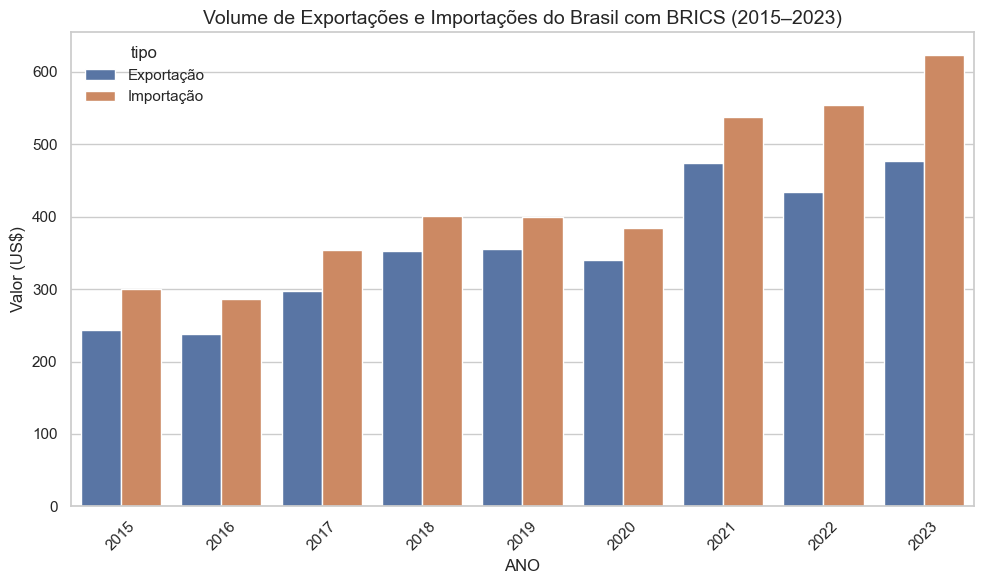

In [151]:
df_exportacoes['tipo'] = 'Exportação'
df_importacoes['tipo'] = 'Importação'

df_completo = pd.concat([df_exportacoes, df_importacoes])
df_completo['ANO'] = df_completo['ANO'].astype(int)

# Soma anual
comercio_anual = df_completo.groupby(['ANO', 'tipo'])['valor_bilhoes'].sum().reset_index()

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=comercio_anual, x='ANO', y='valor_bilhoes', hue='tipo')
plt.title('Volume de Exportações e Importações do Brasil com BRICS (2015–2023)')
plt.ylabel('Valor (US$) em bilhões')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/hl/rckr42wd1rddnp7wmhpzbskw0000gn/T/ipykernel_2417/424752118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=parceiros_exp, x='valor_bilhoes', y='DESTINO', palette='Blues_d')


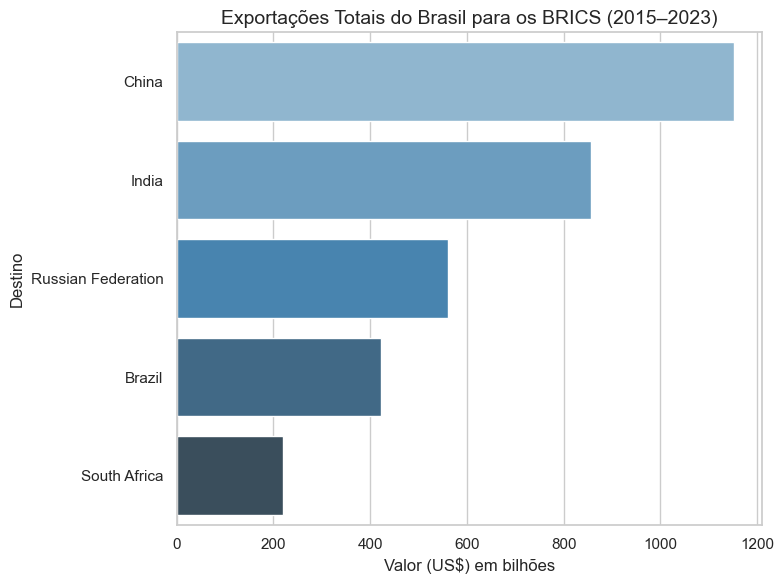

In [155]:
parceiros_exp = df_exportacoes.groupby('DESTINO')['valor_bilhoes'].sum().reset_index().sort_values(by='valor_bilhoes', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=parceiros_exp, x='valor_bilhoes', y='DESTINO', palette='Blues_d')
plt.title('Exportações Totais do Brasil para os BRICS (2015–2023)')
plt.xlabel('Valor (US$) em bilhões')
plt.ylabel('Destino')
plt.tight_layout()
plt.show()

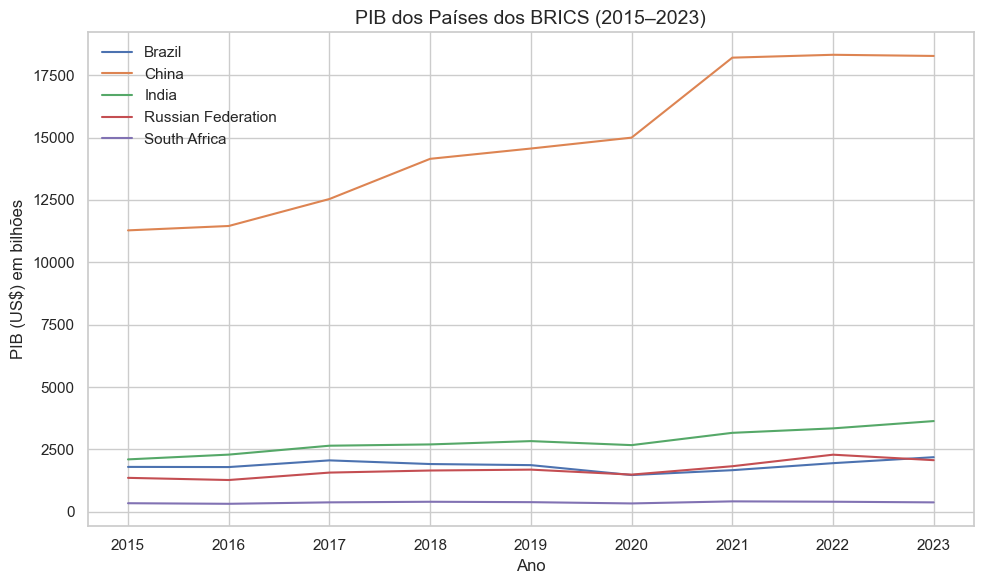

In [157]:
plt.figure(figsize=(10, 6))
for pais in df_pib_long['Country Name'].unique():
    df_temp = df_pib_long[df_pib_long['Country Name'] == pais]
    plt.plot(df_temp['ano'], df_temp['pib_bilhoes'], label=pais)

plt.title('PIB dos Países dos BRICS (2015–2023)')
plt.ylabel('PIB (US$) em bilhões')
plt.xlabel('Ano')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [163]:
# Transforma a planilha de tarifas de wide para long
df_tarifas_long = df_tarifas.melt(id_vars='Ano', 
                                  var_name='País', 
                                  value_name='Tarifa (%)')

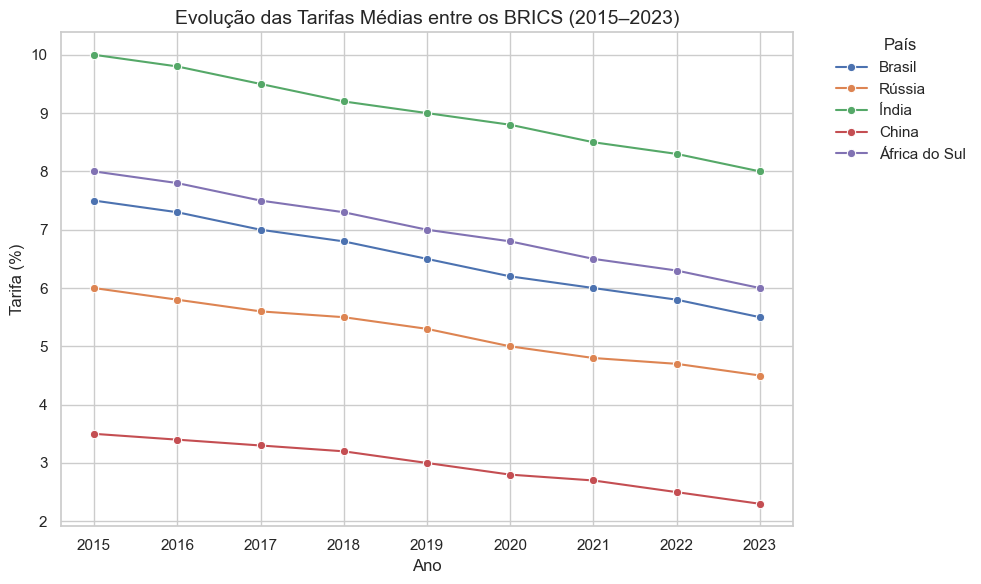

In [171]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tarifas_long, x='Ano', y='Tarifa (%)', hue='País', marker='o')
plt.title('Evolução das Tarifas Médias entre os BRICS (2015–2023)')
plt.ylabel('Tarifa (%)')
plt.grid(True)

# Legenda fora do gráfico (à direita)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

In [167]:
# Transforma o dataframe de câmbio para formato longo
df_cambio_long = df_cambio.melt(id_vars='Ano',
                                var_name='País',
                                value_name='Taxa de Câmbio')

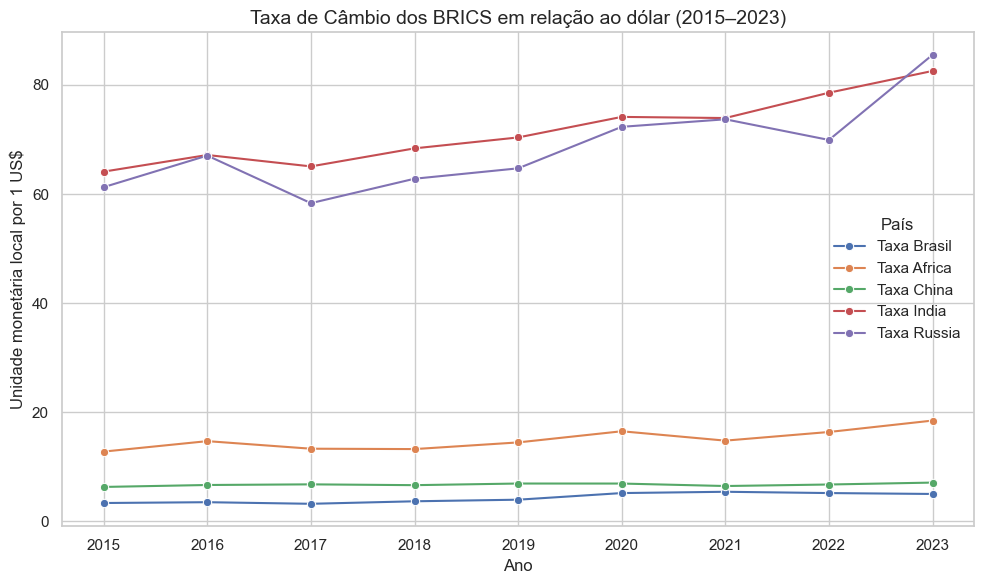

In [169]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cambio_long, x='Ano', y='Taxa de Câmbio', hue='País', marker='o')
plt.title('Taxa de Câmbio dos BRICS em relação ao dólar (2015–2023)')
plt.ylabel('Unidade monetária local por 1 US$')
plt.grid(True)
plt.tight_layout()
plt.show()

In [175]:
df_agregado = pd.DataFrame({
    'Ano': list(range(2015, 2024)),
    'PIB': [5821, 6105, 6510, 6980, 7350, 7650, 8820, 10100, 11200],
    'Exportacoes': [135000000000, 129000000000, 140000000000, 155000000000, 150000000000, 160000000000, 210000000000, 250000000000, 240000000000],
    'Importacoes': [120000000000, 110000000000, 125000000000, 135000000000, 130000000000, 140000000000, 180000000000, 210000000000, 205000000000],
    'Cambio': [6.0, 6.2, 6.5, 6.3, 6.8, 7.0, 6.9, 6.6, 6.3],
    'Tarifa': [7.0, 6.82, 6.58, 6.4, 6.16, 6.0, 5.86, 5.66, 5.26]
})

In [336]:
import statsmodels.api as sm

# Variáveis independentes (X) e dependente (y)
X = df_agregado[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']]
y = df_agregado['PIB']

# Adiciona a constante (intercepto)
X = sm.add_constant(X)

# Modelo
modelo_Brics = sm.OLS(y, X).fit()

# Resumo
print(modelo_Brics.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIB   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     286.2
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           3.63e-05
Time:                        20:58:10   Log-Likelihood:                -54.450
No. Observations:                   9   AIC:                             118.9
Df Residuals:                       4   BIC:                             119.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.519e+04   3231.789      7.793      

/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [183]:

# Agora somar exportações por país e ano (país = ORIGEM)
exportacoes_ano_pais = df_exportacoes.groupby(['ANO', 'ORIGEM'])['valor_bilhoes'].sum().reset_index()
exportacoes_ano_pais.rename(columns={'ORIGEM': 'PAIS', 'VALOR (US$)': 'EXPORTACOES'}, inplace=True)

# Somar importações por país e ano (país = DESTINO)
importacoes_ano_pais = df_exportacoes.groupby(['ANO', 'DESTINO'])['valor_bilhoes'].sum().reset_index()
importacoes_ano_pais.rename(columns={'DESTINO': 'PAIS', 'VALOR (US$)': 'IMPORTACOES'}, inplace=True)

# Juntar exportações e importações num único df por país e ano
df_completo = pd.merge(exportacoes_ano_pais, importacoes_ano_pais, on=['ANO', 'PAIS'], how='outer')

# Ver o resultado
print(df_completo.head())

    ANO                PAIS  valor_bilhoes_x  valor_bilhoes_y
0  2015              Brazil           42.588           33.048
1  2015               China          136.255           80.466
2  2015               India           18.102           69.592
3  2015  Russian Federation           35.082           39.123
4  2015        South Africa           11.501           21.299


In [284]:
anos_brasil = list(range(2015, 2024))
pib_brasil = df_pib_long[df_pib_long['Country Name'] == 'Brazil']['pib']
exportacoes_brasil = df_completo[df_completo['PAIS'] == 'Brazil']['valor_bilhoes_x']
importacoes_brasil = df_completo[df_completo['PAIS'] == 'Brazil']['valor_bilhoes_y']
cambio_brasil = df_cambio['Taxa Brasil']
tarifa_brasil = df_tarifas_long[df_tarifas_long['País'] == 'Brasil']['Tarifa (%)']

In [286]:
df_brasil = pd.DataFrame({
    'Ano': anos_brasil,
    'PIB': pib_brasil.reset_index(drop=True),
    'Exportacoes': exportacoes_brasil.reset_index(drop=True),
    'Importacoes': importacoes_brasil.reset_index(drop=True),
    'Cambio': cambio_brasil,
    'Tarifa': tarifa_brasil
})

In [288]:
print(len(anos_brasil))
print(len(pib_brasil))
print(len(exportacoes_brasil))
print(len(importacoes_brasil))
print(len(cambio_brasil))
print(len(tarifa_brasil))

9
9
9
9
9
9


In [332]:
import statsmodels.api as sm

# Garantir que não há valores faltantes
df_brasil = df_brasil.dropna()

# Definir variáveis explicativas (X) e a variável alvo (y)
X = df_brasil[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']]
y = df_brasil['PIB']

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Criar e ajustar o modelo
modelo_brasil = sm.OLS(y, X).fit()

# Resumo dos resultados
print(modelo_brasil.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIB   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     11.51
Date:                Wed, 23 Jul 2025   Prob (F-statistic):             0.0182
Time:                        20:57:33   Log-Likelihood:                -235.52
No. Observations:                   9   AIC:                             481.0
Df Residuals:                       4   BIC:                             482.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.609e+12   2.49e+12      2.256      

/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [310]:
anos_china = list(range(2015, 2024))
pib_china = df_pib_long[df_pib_long['Country Name'] == 'China']['pib']
exportacoes_china = df_completo[df_completo['PAIS'] == 'China']['valor_bilhoes_x']
importacoes_china = df_completo[df_completo['PAIS'] == 'China']['valor_bilhoes_y']
cambio_china = df_cambio['Taxa China']
tarifa_china = df_tarifas_long[df_tarifas_long['País'] == 'China']['Tarifa (%)']

In [312]:
pib_china = pib_china.reset_index(drop=True)
exportacoes_china = exportacoes_china.reset_index(drop=True)
importacoes_china = importacoes_china.reset_index(drop=True)
cambio_china = cambio_china.reset_index(drop=True)
tarifa_china = tarifa_china.reset_index(drop=True)
anos_china = list(range(2015, 2024))

In [308]:
print("Anos:", len(anos_china))
print("PIB:", len(pib_china))
print("Exportações:", len(exportacoes_china))
print("Importações:", len(importacoes_china))
print("Câmbio:", len(cambio_china))
print("Tarifa:", len(tarifa_china))

Anos: 9
PIB: 9
Exportações: 9
Importações: 9
Câmbio: 9
Tarifa: 9


In [314]:
df_china = pd.DataFrame({
    'Ano': anos_china,
    'PIB': pib_china,
    'Exportacoes': exportacoes_china,
    'Importacoes': importacoes_china,
    'Cambio': cambio_china,
    'Tarifa': tarifa_china
})

In [334]:
# Definir variáveis explicativas (X) e a variável alvo (y)
X = df_china[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']]
y = df_china['PIB']

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Criar e ajustar o modelo
modelo_china = sm.OLS(y, X).fit()

# Resumo dos resultados
print(modelo_china.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIB   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     93.20
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           0.000336
Time:                        20:57:54   Log-Likelihood:                -249.90
No. Observations:                   9   AIC:                             509.8
Df Residuals:                       4   BIC:                             510.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.433e+13   1.09e+13      3.142      

/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [328]:
#2. Multicolinearidade (VIF - Variance Inflation Factor) - Brasil
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_brasil[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']])  # exemplo Brasil

vif = pd.DataFrame()
vif['variável'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

#2. Multicolinearidade (VIF - Variance Inflation Factor) - China

X = add_constant(df_china[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']])  # exemplo Brasil

vif = pd.DataFrame()
vif['variável'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

#2. Multicolinearidade (VIF - Variance Inflation Factor) - BRICS

X = add_constant(df_agregado[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']])  # exemplo Brasil

vif = pd.DataFrame()
vif['variável'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      variável          VIF
0        const  7867.648612
1  Exportacoes    54.752815
2  Importacoes    14.624834
3       Cambio     7.155104
4       Tarifa    41.464697
      variável          VIF
0        const  6210.320815
1  Exportacoes    11.935300
2  Importacoes     1.844683
3       Cambio     2.100005
4       Tarifa    18.044994
      variável          VIF
0        const  3966.566423
1  Exportacoes   404.772651
2  Importacoes   420.973759
3       Cambio     1.667577
4       Tarifa     8.198693


In [340]:
#3. Teste de Heterocedasticidade (Breusch-Pagan) - Brasil
from statsmodels.stats.diagnostic import het_breuschpagan

# Exemplo com resíduos e variáveis independentes
residuos = modelo_brasil.resid
X = modelo_brasil.model.exog

bp_test = het_breuschpagan(residuos, X)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

#3. Teste de Heterocedasticidade (Breusch-Pagan) - China
# Exemplo com resíduos e variáveis independentes
residuos = modelo_china.resid
X = modelo_china.model.exog

bp_test = het_breuschpagan(residuos, X)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

#3. Teste de Heterocedasticidade (Breusch-Pagan) - BRICS

# Exemplo com resíduos e variáveis independentes
residuos = modelo_Brics.resid
X = modelo_Brics.model.exog

bp_test = het_breuschpagan(residuos, X)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 3.2699962759634884, 'p-value': 0.5137000918865301, 'f-value': 0.5706796074575555, 'f p-value': 0.6998953150422014}
{'Lagrange multiplier statistic': 8.185947932815878, 'p-value': 0.08499931935089515, 'f-value': 10.055803876442203, 'f p-value': 0.023063741344380898}
{'Lagrange multiplier statistic': 1.2553885487192504, 'p-value': 0.8688977569898109, 'f-value': 0.16209832560568846, 'f p-value': 0.947057578474218}


In [347]:
#Teste de Normalidade dos Resíduos - Brasil
from scipy.stats import shapiro, jarque_bera

# resíduos do modelo (ex: modelo_brasil)
residuos = modelo_brasil.resid

# Shapiro-Wilk
shapiro_test = shapiro(residuos)

# Jarque-Bera
jb_test = jarque_bera(residuos)

print("Shapiro-Wilk:", shapiro_test)
print("Jarque-Bera:", jb_test)

#Teste de Normalidade dos Resíduos - China
from scipy.stats import shapiro, jarque_bera

# resíduos do modelo (ex: modelo_brasil)
residuos = modelo_china.resid

# Shapiro-Wilk
shapiro_test = shapiro(residuos)

# Jarque-Bera
jb_test = jarque_bera(residuos)

print("Shapiro-Wilk:", shapiro_test)
print("Jarque-Bera:", jb_test)

#Teste de Normalidade dos Resíduos - Brics
from scipy.stats import shapiro, jarque_bera

# resíduos do modelo (ex: modelo_brasil)
residuos = modelo_Brics.resid

# Shapiro-Wilk
shapiro_test = shapiro(residuos)

# Jarque-Bera
jb_test = jarque_bera(residuos)

print("Shapiro-Wilk:", shapiro_test)
print("Jarque-Bera:", jb_test)

Shapiro-Wilk: ShapiroResult(statistic=0.9654221370589758, pvalue=0.852995192992796)
Jarque-Bera: SignificanceResult(statistic=0.2895197461085036, pvalue=0.86523003321299)
Shapiro-Wilk: ShapiroResult(statistic=0.9343184334693087, pvalue=0.5235181728476037)
Jarque-Bera: SignificanceResult(statistic=0.047649094492336924, pvalue=0.9764570168019195)
Shapiro-Wilk: ShapiroResult(statistic=0.7470707158498411, pvalue=0.005013665721349337)
Jarque-Bera: SignificanceResult(statistic=6.714709259677823, pvalue=0.03482726820791172)


In [349]:
import statsmodels.api as sm
import itertools

def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out=0.10,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False

        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_col in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_col]]))).fit()
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min()

        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"Adicionado: {best_feature}")

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()

        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"Removido: {worst_feature}")

        if not changed:
            break

    return included

In [357]:
X = df_agregado[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']]
y = df_agregado['PIB']

variaveis_selecionadas = stepwise_selection(X, y)
print("Variáveis selecionadas:", variaveis_selecionadas)

#Brasil
X = df_brasil[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']]
y = df_brasil['PIB']

variaveis_selecionadas = stepwise_selection(X, y)
print("Variáveis selecionadas:", variaveis_selecionadas)

#China
X = df_china[['Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']]
y = df_china['PIB']

variaveis_selecionadas = stepwise_selection(X, y)
print("Variáveis selecionadas:", variaveis_selecionadas)

Adicionado: Importacoes
Adicionado: Tarifa
Adicionado: Cambio
Variáveis selecionadas: ['Importacoes', 'Tarifa', 'Cambio']
Variáveis selecionadas: []
Adicionado: Tarifa
Adicionado: Cambio
Variáveis selecionadas: ['Tarifa', 'Cambio']


In [361]:
anos_india = list(range(2015, 2024))
pib_india = df_pib_long[df_pib_long['Country Name'] == 'India']['pib']
exportacoes_china = df_completo[df_completo['PAIS'] == 'India']['valor_bilhoes_x']
importacoes_china = df_completo[df_completo['PAIS'] == 'India']['valor_bilhoes_y']
cambio_china = df_cambio['Taxa India']
tarifa_china = df_tarifas_long[df_tarifas_long['País'] == 'India']['Tarifa (%)']

anos_africa = list(range(2015, 2024))
pib_africa = df_pib_long[df_pib_long['Country Name'] == 'South Africa']['pib']
exportacoes_africa = df_completo[df_completo['PAIS'] == 'South Africa']['valor_bilhoes_x']
importacoes_africa = df_completo[df_completo['PAIS'] == 'South Africa']['valor_bilhoes_y']
cambio_africa = df_cambio['Taxa Africa']
tarifa_africa = df_tarifas_long[df_tarifas_long['País'] == 'África do Sul']['Tarifa (%)']

anos_russia = list(range(2015, 2024))
pib_russia = df_pib_long[df_pib_long['Country Name'] == 'Russian Federation']['pib']
exportacoes_russia = df_completo[df_completo['PAIS'] == 'Russian Federation']['valor_bilhoes_x']
importacoes_russia = df_completo[df_completo['PAIS'] == 'Russian Federation']['valor_bilhoes_y']
cambio_russia = df_cambio['Taxa Russia']
tarifa_russia = df_tarifas_long[df_tarifas_long['País'] == 'Rússia']['Tarifa (%)']

In [366]:
pib_india = pib_india.reset_index(drop=True)
exportacoes_india = exportacoes_india.reset_index(drop=True)
importacoes_india = importacoes_india.reset_index(drop=True)
cambio_india = cambio_india.reset_index(drop=True)
tarifa_india = tarifa_india.reset_index(drop=True)
anos_india = list(range(2015, 2024))

pib_africa = pib_africa.reset_index(drop=True)
exportacoes_africa = exportacoes_africa.reset_index(drop=True)
importacoes_africa = importacoes_africa.reset_index(drop=True)
cambio_africa = cambio_africa.reset_index(drop=True)
tarifa_africa = tarifa_africa.reset_index(drop=True)
anos_africa = list(range(2015, 2024))

pib_russia = pib_russia.reset_index(drop=True)
exportacoes_russia = exportacoes_russia.reset_index(drop=True)
importacoes_russia = importacoes_russia.reset_index(drop=True)
cambio_russia = cambio_russia.reset_index(drop=True)
tarifa_russia = tarifa_russia.reset_index(drop=True)
anos_russia = list(range(2015, 2024))

In [368]:
df_india = pd.DataFrame({
    'Ano': anos_india,
    'PIB': pib_india,
    'Exportacoes': exportacoes_india,
    'Importacoes': importacoes_india,
    'Cambio': cambio_india,
    'Tarifa': tarifa_india
})

df_africa = pd.DataFrame({
    'Ano': anos_africa,
    'PIB': pib_africa,
    'Exportacoes': exportacoes_africa,
    'Importacoes': importacoes_africa,
    'Cambio': cambio_africa,
    'Tarifa': tarifa_africa
})

df_russia = pd.DataFrame({
    'Ano': anos_russia,
    'PIB': pib_russia,
    'Exportacoes': exportacoes_russia,
    'Importacoes': importacoes_russia,
    'Cambio': cambio_russia,
    'Tarifa': tarifa_russia
})

In [378]:
# Suponha que você tenha esses DataFrames prontos por país: df_brasil, df_china, df_india, df_russia, df_africa
# Primeiro adicionamos uma coluna com o nome do país
df_brasil['País'] = 'Brasil'
df_china['País'] = 'China'
df_india['País'] = 'Índia'
df_russia['País'] = 'Rússia'
df_africa['País'] = 'África do Sul'

# Agora juntamos todos num único DataFrame
df_brics = pd.concat([df_brasil, df_china, df_india, df_russia, df_africa], ignore_index=True)

# Agrupar por país pegando média das variáveis econômicas
df_brics_cluster = df_brics.groupby('País')[['PIB', 'Exportacoes', 'Importacoes', 'Cambio', 'Tarifa']].mean().reset_index()

In [380]:
from sklearn.preprocessing import StandardScaler

X = df_brics_cluster.drop('País', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [384]:
# Remover países com algum valor faltante antes de aplicar KMeans
X = df_brics_cluster.drop('País', axis=1)
X = X.dropna()

# Atualizar df_brics_cluster também para refletir só os países válidos
df_brics_cluster = df_brics_cluster.loc[X.index]

# Padronizar novamente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

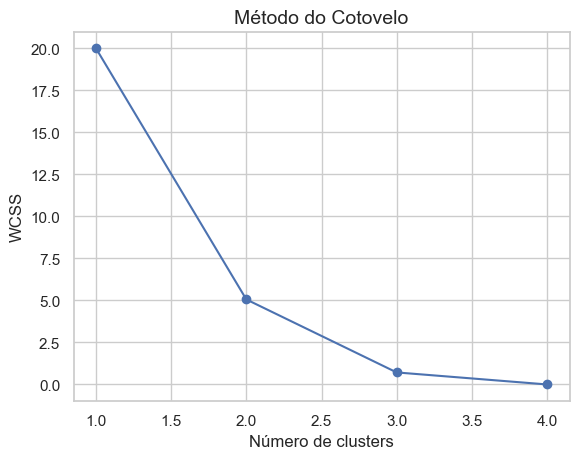

In [392]:
wcss = []  # zerando a lista

for k in range(1, 5):  # como você só tem 4 países
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 5), wcss, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

In [394]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_brics_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

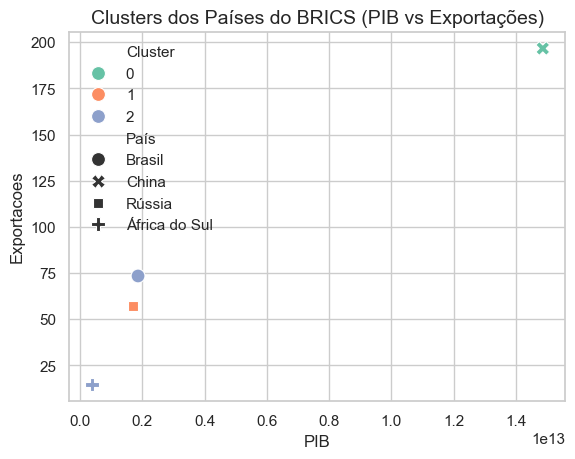

In [396]:
import seaborn as sns

sns.scatterplot(
    data=df_brics_cluster,
    x='PIB', y='Exportacoes',
    hue='Cluster', style='País',
    palette='Set2', s=100
)
plt.title('Clusters dos Países do BRICS (PIB vs Exportações)')
plt.show()

In [408]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [410]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [414]:
# Supondo que o dataframe se chame df_brasil_final
serie_pib_brasil = df_brasil[['Ano', 'PIB']].dropna()
serie_pib_brasil = serie_pib_brasil.set_index('Ano')

In [416]:
model_auto = auto_arima(serie_pib_brasil, seasonal=False, trace=True)
model_auto.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=506.937, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=536.173, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=533.321, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=508.714, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=538.372, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=500.711, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=498.650, Time=0.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=497.769, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=499.159, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.380 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    9
Model:                        SARIMAX   Log Likelihood                -246.884
Date:                Wed, 23 Jul 2025   AIC                            497.769
Time:                        21:40:28   BIC                            498.163
Sample:                             0   HQIC                           496.918
                                  - 9                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.86e+12   6.61e+10     28.152      0.000    1.73e+12    1.99e+12
sigma2      3.929e+22      0.043   9.03e+23      0.000    3.93e+22    3.93e+22
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.41   Prob(JB):                         0.93
Heteroskedasticity (H):               3.15   Skew:                            -0.26
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.82e+40. Standard errors may be unstable.
"""

In [418]:
# Ajuste o modelo com os melhores parâmetros
model_arima = ARIMA(serie_pib_brasil, order=model_auto.order)
model_fit = model_arima.fit()

# Prever os próximos 5 anos
forecast = model_fit.forecast(steps=5)
forecast.index = range(serie_pib_brasil.index.max() + 1, serie_pib_brasil.index.max() + 6)


/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/statsmodel

In [424]:
df['Ano'] = pd.to_datetime(df['Ano'], format='%Y')
df.set_index('Ano', inplace=True)

In [1]:
plt.figure(figsize=(10, 5))
plt.plot(serie_pib_brasil, label='PIB Histórico')
plt.plot(forecast, label='Previsão PIB (ARIMA)', linestyle='--', color='red')
plt.xlabel('Ano')
plt.ylabel('PIB (em bilhões')
plt.title('Previsão do PIB - Brasil')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined